In [40]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
conn = sqlite3.connect('../db/sensor_data.sqlite')
table = "full_flat_sensor_data"  # 테이블명 , 언젠가 바꿀 수도..

query = "SELECT * FROM " + table 

df = pd.read_sql_query(query, conn)

In [7]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111870 entries, 0 to 111869
Data columns (total 62 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  111870 non-null  int64  
 1   device_id                           111870 non-null  object 
 2   device_manufacturer                 111870 non-null  object 
 3   device_name                         111870 non-null  object 
 4   dust_sensor_manufacturer            111870 non-null  object 
 5   dust_sensor_name                    111870 non-null  object 
 6   temp_sensor_manufacturer            111870 non-null  object 
 7   temp_sensor_name                    111870 non-null  object 
 8   overcurrent_sensor_manufacturer     111870 non-null  object 
 9   overcurrent_sensor_name             111870 non-null  object 
 10  thermal_camera_sensor_manufacturer  111870 non-null  object 
 11  thermal_camera_sensor_name

In [8]:
df.device_id.value_counts()

device_id
oht01    3731
oht09    3730
oht11    3730
oht10    3730
oht08    3730
oht07    3730
oht06    3730
oht05    3730
oht02    3729
oht03    3693
oht12    3671
oht18    3671
oht17    3671
oht15    3671
oht14    3671
oht13    3671
oht16    3671
oht04    3431
agv02    2527
agv01    2527
agv04    2527
agv03    2527
agv06    2527
agv05    2527
agv08    2527
agv07    2527
agv11    2527
agv10    2527
agv09    2527
agv13    2526
agv15    2526
agv16    2526
agv12    2526
agv14    2526
agv18    2526
agv17    2526
Name: count, dtype: int64

In [9]:
df.device_name.value_counts()

device_name
A1    66391
B1    22743
C1    22736
Name: count, dtype: int64

In [10]:
df.device_manufacturer.value_counts()

device_manufacturer
A    66391
B    22743
C    22736
Name: count, dtype: int64

In [13]:
print(df.dust_sensor_name.value_counts(),
df.temp_sensor_name.value_counts(),
df.overcurrent_sensor_name.value_counts(),
df.thermal_camera_sensor_name.value_counts())

dust_sensor_name
S02    111870
Name: count, dtype: int64 temp_sensor_name
S10    111870
Name: count, dtype: int64 overcurrent_sensor_name
S18    111870
Name: count, dtype: int64 thermal_camera_sensor_name
S26    111870
Name: count, dtype: int64


In [15]:
df.collection_date.value_counts().sort_index()

collection_date
08-26    12297
08-27    20162
08-28      902
08-29      602
08-30      902
09-01    11907
09-02    14016
09-03    13177
09-04      301
09-05      301
09-06     1203
09-10      301
09-11      301
09-14      301
09-20    17151
10-24     2887
10-26     3610
10-27    11549
Name: count, dtype: int64

In [21]:
df.sensor_types[0]

'NTC, PM10, PM2.5, PM1.0, CT1, CT2, CT3, CT4'

In [23]:
df.cumulative_operating_day.value_counts().sort_index()

cumulative_operating_day
13    45479
18    66391
Name: count, dtype: int64

In [25]:
# 0~20이라는데 이게 뭘 의미하는 걸까
df.equipment_history.value_counts().sort_index()


equipment_history
13    66391
7     45479
Name: count, dtype: int64

In [27]:
df.img_description.value_counts().sort_index()

img_description
agv01의 현재 내부 온도(최대값)    2527
agv02의 현재 내부 온도(최대값)    2527
agv03의 현재 내부 온도(최대값)    2527
agv04의 현재 내부 온도(최대값)    2527
agv05의 현재 내부 온도(최대값)    2527
agv06의 현재 내부 온도(최대값)    2527
agv07의 현재 내부 온도(최대값)    2527
agv08의 현재 내부 온도(최대값)    2527
agv09의 현재 내부 온도(최대값)    2527
agv10의 현재 내부 온도(최대값)    2527
agv11의 현재 내부 온도(최대값)    2527
agv12의 현재 내부 온도(최대값)    2526
agv13의 현재 내부 온도(최대값)    2526
agv14의 현재 내부 온도(최대값)    2526
agv15의 현재 내부 온도(최대값)    2526
agv16의 현재 내부 온도(최대값)    2526
agv17의 현재 내부 온도(최대값)    2526
agv18의 현재 내부 온도(최대값)    2526
oht01의 현재 내부 온도(최대값)    3731
oht02의 현재 내부 온도(최대값)    3729
oht03의 현재 내부 온도(최대값)    3693
oht04의 현재 내부 온도(최대값)    3431
oht05의 현재 내부 온도(최대값)    3730
oht06의 현재 내부 온도(최대값)    3730
oht07의 현재 내부 온도(최대값)    3730
oht08의 현재 내부 온도(최대값)    3730
oht09의 현재 내부 온도(최대값)    3730
oht10의 현재 내부 온도(최대값)    3730
oht11의 현재 내부 온도(최대값)    3730
oht12의 현재 내부 온도(최대값)    3671
oht13의 현재 내부 온도(최대값)    3671
oht14의 현재 내부 온도(최대값)    3671
oht15의 현재 내부 온도(최대값)    3671
oht16의 현재 내부 온도(최대값)    367

In [38]:
print(df.annotation_state.value_counts().sort_index(),
df.annotation_type.value_counts().sort_index())

annotation_state
0    54928
1    24081
2    24191
3     8670
Name: count, dtype: int64 annotation_type
tagging    111870
Name: count, dtype: int64


In [37]:
print(df.CT1_unit.value_counts().sort_index(),
df.CT1_trend.value_counts().sort_index(),
df.ex_humidity_unit.value_counts().sort_index(),
df.ex_humidity_trend.value_counts().sort_index())



CT1_unit
A    111870
Name: count, dtype: int64 CT1_trend
1    111870
Name: count, dtype: int64 ex_humidity_unit
%    111870
Name: count, dtype: int64 ex_humidity_trend
1    111870
Name: count, dtype: int64


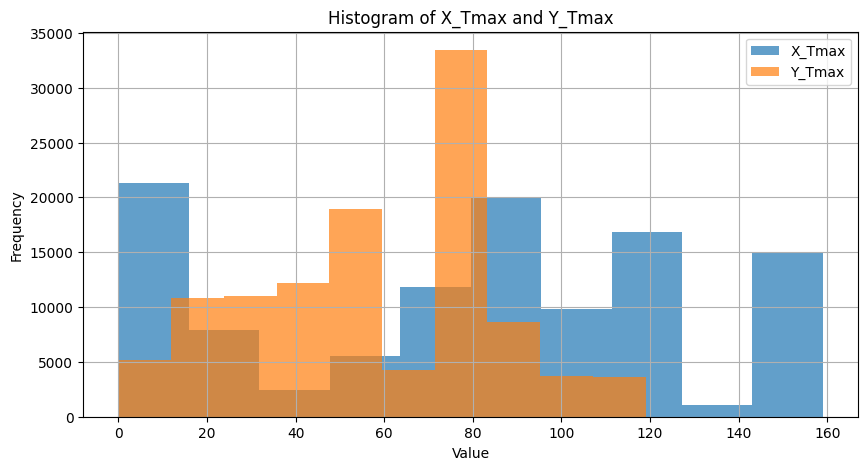

In [41]:
# 히스토그램 출력할 두 컬럼 지정
col1 = 'X_Tmax'
col2 = 'Y_Tmax'

# 히스토그램 그리기
plt.figure(figsize=(10, 5))
plt.hist(df[col1], bins=10, alpha=0.7, label=col1)
plt.hist(df[col2], bins=10, alpha=0.7, label=col2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of {col1} and {col2}')
plt.legend()
plt.grid(True)
plt.show()